# FLIP (00): Data Science 
**(Module 03: Linear Algebra)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use,but NOT allowed to change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au), Australia

---
## Session 13 QR Foctorisation

# $QR$ factorisation

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

## The full spectrum of a matrix

Our aim is to compute the full spectrum of the square $n \times n$
matrix $A$; that is, we want to find all its eigenvalues.

Method: transform to a simpler problem that is straightforwardly solved.
E.g. transform $A$ to $B$ with same spectrum, but $B$ triangular:
eigenvalues of a triangular matrix are the diagonal coefficients.

Schur’s theorem shows that every matrix $A$ has a *similar* triangular
matrix $B$, but is not useful for finding the matrix in practice.

The proof of Schur’s theorem made repeated use of *Householder
reflections*; these are generally useful as we shall see later.

## $QR$ factorisation

Another decomposition method for a general (not necessarily square)
matrix: *orthogonal factorisation*. $A$ written as product of matrices,
some of which are orthogonal (i.e. real – $Q^{\dagger} =
  Q^T$ – and unitary, $Q^{-1} = Q^{\dagger} = Q^T$).

Simplest example: *Householder’s* $QR$-factorisation

$$A = Q R,$$

with $Q$ unitary, $R$ upper triangular. $A$ and $R$ may be $m
  \times n$ matrices, but $Q$ is always square ($m \times m$).

If $A = QR$ with $Q$ unitary then

$$B = R Q = \left( Q^{\dagger} Q \right) R Q = Q^{\dagger} A Q$$

which is similar to $A$.

## Householder’s factorisation

Need factorisation $A = QR$; or construct unitary $Q$ such that

$$Q^{\dagger} A = R$$

where $R$ is upper triangular.

Done by iterative process using *Householder transformations*

$$U_k =
    \begin{pmatrix}
      \text{Id}_{k-1} & 0 \\
      0 & \text{Id}_{m-k+1} - {\boldsymbol{u}}_k {\boldsymbol{u}}_k^{\dagger}
    \end{pmatrix}.$$

Simple generalization of Householder reflections; when $k=1$ it *is* a
Householder reflection.

###  The iterative process

To convert original $A$ into upper triangular matrix $R$, at each stage
construct matrix rotating $k^{\text{th}}$ column of $A$,
${\boldsymbol{a}}_k$, into $\hat{{\boldsymbol{e}}}_k$ that is zero in
all entries $>k$. So

$$\begin{aligned}
    {\boldsymbol{e}}_1 = \mu_{1,1} \hat{{\boldsymbol{e}}_1} & = (\mu_{1,1}, 0, \dots, 0)^T.  
   \end{aligned}$$

At first stage need a Householder reflection to take
${\boldsymbol{a}}_1$ to (a multiple of) ${\boldsymbol{e}}_1$. The later
stages do not care what happens to entries “above” the diagonal. So they
can be multiplied by the identity matrix. Thus at each stage a suitable
Householder transformation

$$U_k =
    \begin{pmatrix}
      \text{Id}_{k-1} & 0 \\
      0 & \text{Id}_{m-k+1} - {\boldsymbol{u}}_k {\boldsymbol{u}}_k^{\dagger}
    \end{pmatrix}$$

takes column ${\boldsymbol{a}}_k$ to “upper triangular” column $k$ of
the new matrix, without altering columns ${\boldsymbol{a}}_l, \,\, l<k$.

###  The rotation

At each stage rotate (part of) column ${\boldsymbol{a}}_k$ into “lower
triangular” column $\hat{{\boldsymbol{e}}}_k$. This gives the vector
${\boldsymbol{u}}$ for the Householder reflection

$${\boldsymbol{u}}_k = \frac{\sqrt{2}}{\| {\boldsymbol{a}}_k - \beta_k \hat{{\boldsymbol{e}}}_k \|}
    ( {\boldsymbol{a}}_k - \beta_k \hat{{\boldsymbol{e}}}_k ),$$

where $\beta_k$ is such that
$\|{\boldsymbol{a}}_k\| = \beta_k \|\hat{{\boldsymbol{e}}}_k\|$, so the
reflection is a unitary matrix.

$$\begin{aligned}
      U_1A & \,=     
      \left(\text{Id}_{m} - {\boldsymbol{u}}_1 {\boldsymbol{u}}_1^{\dagger}\right) A
      \\
      &\, = \left(\begin{array}{c|c}
        \beta_1 & *\\
    \hline
    \boldsymbol{0} & W_{m-1}
      \end{array}\right).
    \end{aligned}$$

$$\begin{aligned}
      U_2U_1A & \,=     
      \Bigg(\begin{array}{c c}
    \text{Id}_{1} & 0 \\
    0 & \text{Id}_{m-1} - {\boldsymbol{u}}_2 {\boldsymbol{u}}_2^{\dagger}
      \end{array}\Bigg)
      \left(\begin{array}{c|c}
        \beta_1 & *\\
    \hline
    \boldsymbol{0} & W_{m-1}
      \end{array}\right)\\
      &\, = \left(\begin{array}{c c|c}
        \beta_1 & * & *\\
    0 & \beta_2 & *\\
    \hline
    \boldsymbol{0} & \boldsymbol{0} & W_{m-2}
      \end{array}\right).
    \end{aligned}$$


$$\begin{aligned}
      U_3U_2U_1A &\, 
      = \left(\begin{array}{c c c|c}
        \beta_1 & * & *& *\\
        0 & \beta_2 & * & *\\
        0 & 0 & \beta_3 & * \\
    \hline
    \boldsymbol{0} & \boldsymbol{0} & \boldsymbol{0} & W_{m-3}
      \end{array}\right).
    \end{aligned}$$


$$\begin{aligned}
      U_4U_3U_2U_1A &\, 
      = \left(\begin{array}{c c c c|c}
        \beta_1 & * & *& *& *\\
        0 & \beta_2 & * & *& *\\
        0 & 0 & \beta_3 & *& * \\
        0 & 0 & 0 & \beta_4 & * \\
    \hline
    \boldsymbol{0} & \boldsymbol{0} & \boldsymbol{0} & \boldsymbol{0} & W_{m-4}
      \end{array}\right).
    \end{aligned}$$

###  Consequences

The result of applying $k$ Householder transforms is

$$U_k U_{k-1} \dots U_2 U_1 A = \left(
      \begin{array}{c|c}
        J & H \\ \hline 0 & W
      \end{array}\right)$$

where $J$ is upper triangular. After $n-1$ transforms we have the upper
triangular matrix $R$ required.

As each $U_i$ is unitary, the product

$$Q^{\dagger} = U_{n-1} U_{n-2} \dots U_2 U_1$$

is unitary, and hence

$$Q = U_1 U_2 \dots U_{n-2} U_{n-1}.$$

## The $QR$ algorithm of Francis

$QR$ algorithm: iterative process that, in the limit, gives upper
triangular $A_{\infty}$ similar to $A$. Two steps at each iteration:

1.  Factorize $A_k$ using Householder’s algorithm to get

    $$A_k = Q_k R_k.$$

2.  Compute the next guess $A_{k+1}$ using

    $$A_{k+1} = R_k Q_k.$$

From the definition

$$A_{k+1}  = R_k Q_k = Q_k^{\dagger} Q_k R_k Q_k = Q_k^{\dagger} A_k Q_k$$

so that all members of the sequence are similar.

Start sequence with $A_1 = A$; iterate sequence to produce a triangular
matrix. If $A_k$ upper triangular then $Q_k = I$: sequence has converged

$$\begin{aligned}
    A_{k+1} & = A_k .
  \end{aligned}$$

### Example

We apply the $QR$ algorithm to

$$A =
    \begin{pmatrix}
      1 & 2 & 3 \\
      4 & 5 & 6 \\
      7 & 8 & 0
    \end{pmatrix}.$$

Start from $A_1 = A$, and at each stage we compute the
$QR$-factorisation, setting $A_{k+1}  = R_k Q_k$. We find

$$A =
        \begin{pmatrix}
          1 & 2 & 3 \\
          4 & 5 & 6 \\
          7 & 8 & 0
        \end{pmatrix} \rightarrow 
        A_2 = 
        \begin{pmatrix}
          8.5909 &  -9.2413  &  3.1659\\
          -4.3423 &  -1.0909 &   1.1078\\
          3.1659  &  1.1078 &  -1.5000
        \end{pmatrix}$$

$$A =
        \begin{pmatrix}
          1 & 2 & 3 \\
          4 & 5 & 6 \\
          7 & 8 & 0
        \end{pmatrix} \rightarrow 
        A_3 = 
        \begin{pmatrix}
          12.1434 &  -0.1941 &   2.7400 \\
          3.6616 &  -5.8055 &   1.3022 \\
          0.1341 &  -0.2284 &  -0.3379
        \end{pmatrix}$$

$$A =
        \begin{pmatrix}
          1 & 2 & 3 \\
          4 & 5 & 6 \\
          7 & 8 & 0
        \end{pmatrix} \rightarrow 
        A_4 = 
        \begin{pmatrix}
          11.6370 &  -5.3339 &  -3.0770\\
          -1.5849 &  -5.2507 &  -0.6576\\
          0.0041  &  0.0146  & -0.3863
        \end{pmatrix}$$

$$A =
        \begin{pmatrix}
          1 & 2 & 3 \\
          4 & 5 & 6 \\
          7 & 8 & 0
        \end{pmatrix} \rightarrow 
        A_5 = 
        \begin{pmatrix}
          12.2535 &  -2.9417 &   2.9725\\
          0.7988  & -5.8653  &  1.0822\\
          0.0001  & -0.0011  & -0.3882
        \end{pmatrix}$$

$$A =
        \begin{pmatrix}
          1 & 2 & 3 \\
          4 & 5 & 6 \\
          7 & 8 & 0
        \end{pmatrix} \rightarrow 
        A_6 = 
        \begin{pmatrix}
          12.0378 &  -4.1083 &  -3.0373\\
          -0.3683 &  -5.6494 &  -0.8874\\
          0.0000  &  0.0001  & -0.3884
        \end{pmatrix}$$

$$A =
        \begin{pmatrix}
          1 & 2 & 3 \\
          4 & 5 & 6 \\
          7 & 8 & 0
        \end{pmatrix} \rightarrow 
        A_7 = 
        \begin{pmatrix}
          12.1581 &  -3.5634 &   3.0087 \\
          0.1765  & -5.7697  &  0.9800 \\
          0.0000  & -0.0000  & -0.3884
        \end{pmatrix}$$

The matrix

$$A =
        \begin{pmatrix}
          1 & 2 & 3 \\
          4 & 5 & 6 \\
          7 & 8 & 0
        \end{pmatrix}$$

has eigenvalues

$$\left\{
          \begin{array}{c}
            12.1229\\ -5.7345\\ -0.3884
          \end{array}\right. .$$

The $QR$ algorithm of Francis converges to all eigenvalues linearly.

In [3]:
def qr_francis(A, niterations_max=100, tol=1e-15):
    B = np.copy(A)
    evals_approx = np.zeros((len(A),niterations_max))
    evals_approx[:,0] = np.diag(A)
    err = 1.0
    n = 0
    while err > tol and n < niterations_max:
        Q, R = np.linalg.qr(B)
        B = np.dot(R, Q)
        err = np.linalg.norm(np.tril(B, -1))
        n += 1
        evals_approx[:,n]=np.diag(B)
    return np.diag(B), evals_approx

In [4]:
A = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0],[7.0,8.0,0.0]])
lamda, v = np.linalg.eig(A)
lamda_qr, lamda_seq = qr_francis(A)
print("QR gives eigenvalues of {}. Exact are {}.".format(lamda_qr, lamda))

QR gives eigenvalues of [ 12.12289378  -5.73450994  -0.38838384]. Exact are [ 12.12289378  -0.38838384  -5.73450994].


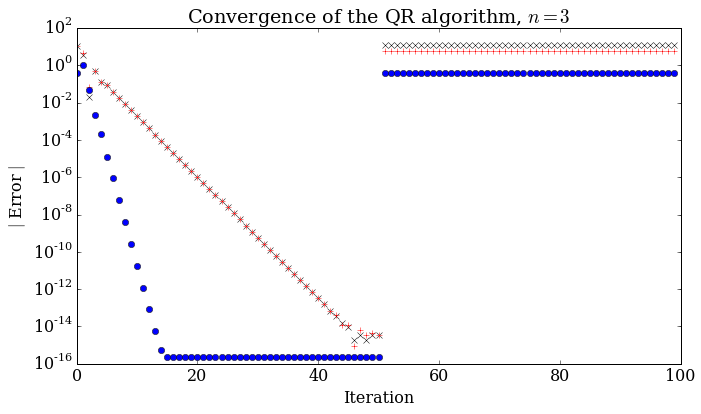

In [5]:
errors = np.zeros_like(lamda_seq)
errors[0,:] = np.abs(lamda_seq[0,:]-lamda[0])
errors[1,:] = np.abs(lamda_seq[1,:]-lamda[2])
errors[2,:] = np.abs(lamda_seq[2,:]-lamda[1])
iterations = range(errors.shape[1])

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.semilogy(iterations, errors[0,:], 'kx')
ax.semilogy(iterations, errors[1,:], 'r+')
ax.semilogy(iterations, errors[2,:], 'bo')
ax.set_xlabel('Iteration')
ax.set_ylabel(r"$\|$ Error $\|$")
ax.set_title(r"Convergence of the QR algorithm, $n=3$")
fig.tight_layout()
plt.show()

## $QR$ convergence

###  Comparison with power method

Proving that QR algorithm converges not easy. Get some insight from
comparison with power method.

Power method: repeated matrix multiplication to find the eigenvector of
largest eigenvalue.

$$A^k\boldsymbol{x} = \boldsymbol{x}^{(k)} = \lambda_1^k\left[ a_1\boldsymbol{u}_1 + 
      \sum_{j=2}^{N}\left(\frac{\lambda_j}{\lambda_1}\right)^ka_j\boldsymbol{u}_j   \right].$$

Obvious extension: apply to multiple vectors at the same time.

Problem: method will converge to multiple copies of the same
eigenvector.

###  Comparison with power method

Overcome problem by *orthonormalising* the vectors at each stage.

$QR$ algorithm does this by expressing the “guess” as an orthonormal
matrix $Q$ at each stage.

Method works by removing the dominant eigenvector from the basis.
Remaining “guesses” converge to the eigenvector of dominant eigenvalue
within the resulting subspace.

## Summary


-   To compute all eigenvalues we use the $QR$ algorithm of Francis.

-   This algorithm is iterative and converges linearly.

-   It relies on Householder transformations, a generalization of
    Householder reflections.

-   Each step in the sequence relies on the $QR$ factorisation of the
    matrix. As $Q$ is unitary, each member of the sequence is similar
    and so the spectrum is unchanged.

-   Interpreting the algorithm as a generalized power method is possible
    but not straightforward.